<a href="https://colab.research.google.com/github/EyeofaThous/AAE590/blob/main/AAE590Lecture15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1

In [27]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the datasets
datasets = pd.read_csv('https://raw.githubusercontent.com/mahesh147/Support-Vector-Machine/master/Social_Network_Ads.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.9, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)
# Fitting the classifier into the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

<ipython-input-28-1f52ea7d0531>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


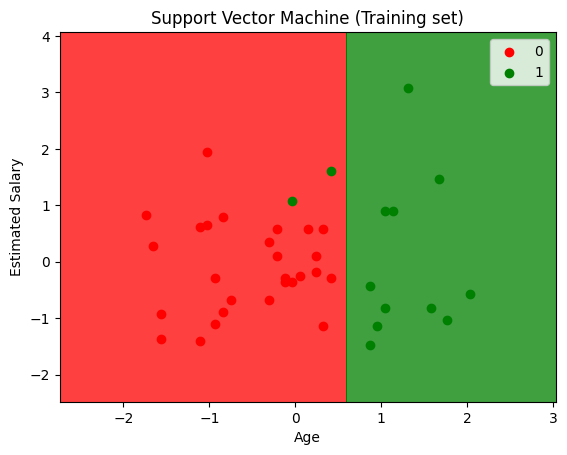

In [28]:
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() +
1, step = 0.01),
np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
  c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Exercise 2

<ipython-input-43-d15ab294982b>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_scaled), max(X_scaled), 0.01).reshape(-1, 1)


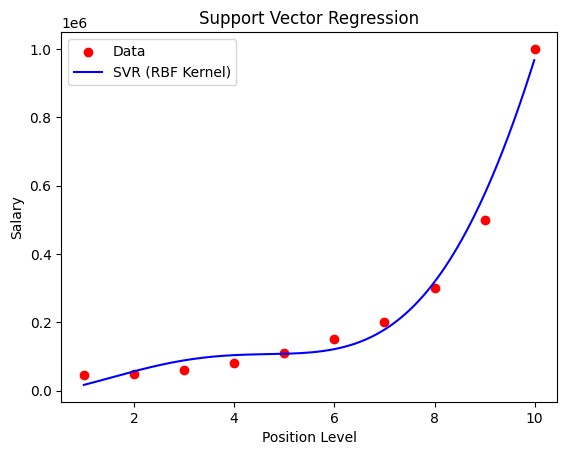

In [43]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
# Sample dataset (Position vs. Salary)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]) # Position level
y = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]) # Salary
# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()
# Train SVR model with RBF kernel
regressor = SVR(kernel='rbf', C=1e3, gamma=.1)
regressor.fit(X_scaled, y_scaled)
# Generate smooth curve for visualization
X_grid = np.arange(min(X_scaled), max(X_scaled), 0.01).reshape(-1, 1)
y_pred = regressor.predict(X_grid)
# Inverse scaling for interpretability
X_plot = scaler_X.inverse_transform(X_grid)
y_plot = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
# Plot results
plt.scatter(scaler_X.inverse_transform(X_scaled), scaler_y.inverse_transform(y_scaled.reshape(-1, 1)),
color='red', label='Data')
plt.plot(X_plot, y_plot, color='blue', label='SVR (RBF Kernel)')
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()
